# Example Dataset

## Importing Packages

In [20]:
from ISLP import load_data

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Preparing the Datasets

### 0. Importing the Datasets
For the sample only, we are going to import the `Credit` dataset from `ISLP`.

In [21]:
Credit = load_data('Credit')

### 1. Setting Up the Training and Test Datasets
We will split the original dataset into 4 different splitting strategies, with the proportion of traning and test as follows: 40/60, 60/40, 80/20, and 90/10.

First, we split the original dataset into feature and label columns, as the target we are considering now is `Student`.

In [22]:
Credit_feature = Credit.drop(columns=['Student'])
Credit_label = Credit['Student']

Then the feature and label are split into 4 splitting strategies as mentioned above.

In [23]:
training_sizes = {
    "40/60": 0.4,
    "60/40": 0.6,
    "80/20": 0.8,
    "90/10": 0.9,
}

datasets = {}

for name, training_size in training_sizes.items():
    feature_train, feature_test, label_train, label_test = train_test_split(
        Credit_feature, Credit_label,
        test_size=(1 - training_size),
        shuffle=True,
        stratify=Credit_label
    )

    datasets[name] = (feature_train, feature_test, label_train, label_test)

After splitting the datasets, the visualization of the class distribution is as follows.

#### Original Set

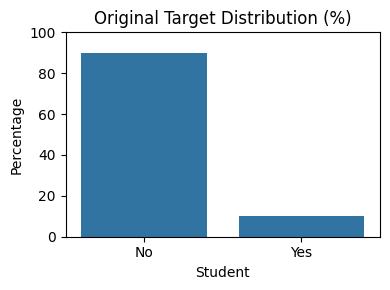

In [24]:
plt.figure(figsize=(4,3))
original_pct = Credit_label.value_counts(normalize=True) * 100
original_df = pd.DataFrame({
    'Student': original_pct.index.astype(str),
    'Percentage': original_pct.values
})

sns.barplot(data=original_df, x='Student', y='Percentage')
plt.title("Original Target Distribution (%)")
plt.ylim(0, 100)
plt.ylabel("Percentage")
plt.xlabel("Student")
plt.tight_layout()
plt.show()

#### Training Set

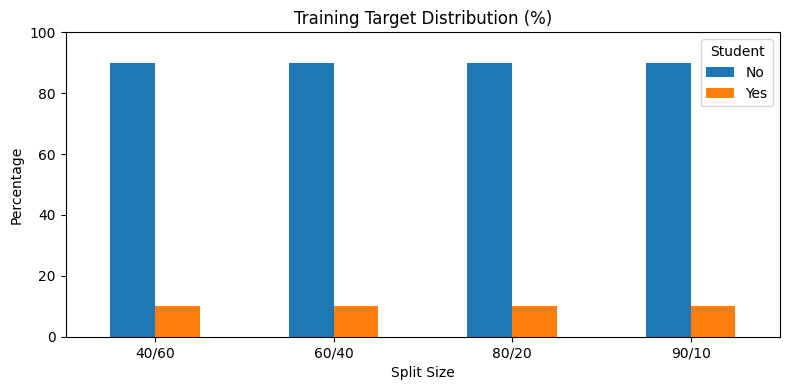

In [34]:
train_distributions = {}

for name, (feature_train, feature_test, label_train, label_test) in datasets.items():
    train_pct = label_train.value_counts(normalize=True) * 100
    train_distributions[name] = train_pct

train_df = pd.DataFrame(train_distributions).T

train_df.plot(kind='bar', figsize=(8, 4), legend=True)
plt.title("Training Target Distribution (%)")
plt.ylim(0, 100)
plt.ylabel("Percentage")
plt.xlabel("Split Size")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Test Set

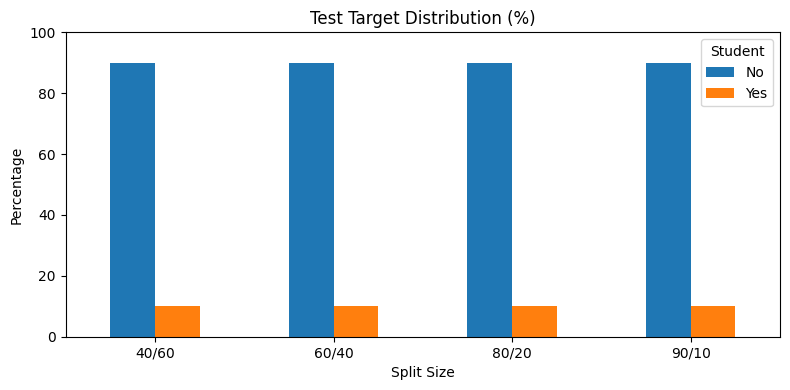

In [35]:
test_distributions = {}

for name, (feature_train, feature_test, label_train, label_test) in datasets.items():
    test_pct = label_test.value_counts(normalize=True) * 100
    test_distributions[name] = test_pct

test_df = pd.DataFrame(test_distributions).T

test_df.plot(kind='bar', figsize=(8, 4), legend=True)
plt.title("Test Target Distribution (%)")
plt.ylim(0, 100)
plt.ylabel("Percentage")
plt.xlabel("Split Size")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

As can be seen from three plots above, the dataset is relatively balanced across both training and test splits, which indicates that the preparation was appropriate.

However, some features of the datasets appears to be categorical. Therefore, we are going to perform one-hot encoding on categorical columns using `sklearn`'s `OneHotEncoder`.

### 2. Building the Decision Tree Classifiers